In [2]:
import numpy as np
import scipy 
from scipy import signal
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt
from scipy.io.wavfile import read as wavread
from scipy.signal import find_peaks


In [1]:
path = '/Users/noelalben/Downloads/Fur Elise - Beethoven (Right Hand only) | BEGINNER PIANO TUTORIAL + SHEET MUSIC by Betacustic.wav'

In [3]:
fs, x = wavread(path)
x = x.flatten()
x = x/np.max(x)

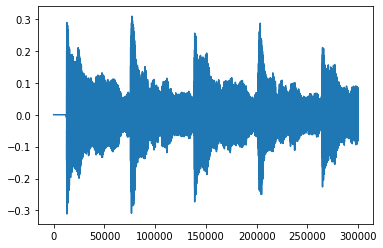

In [4]:
plt.plot(x[380000:680000])
x = x[380000:680000]

In [7]:
f, t, Zxx = signal.spectrogram(x, fs,'hann', nperseg=1024)


In [9]:
x.size


300000

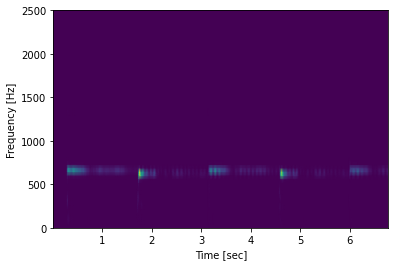

334

In [10]:
plt.pcolormesh(t, f, Zxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 2500)
plt.show()
t.size

In [11]:
    win_harm =31 #Horizontal
    win_perc = 31 #Vertical
    harm = np.empty_like(Zxx)
    harm[:] = median_filter(Zxx, size=(1,win_harm ), mode='reflect')
    perc = np.empty_like(Zxx)
    perc[:] = median_filter(Zxx, size=(win_perc, 1), mode='reflect')

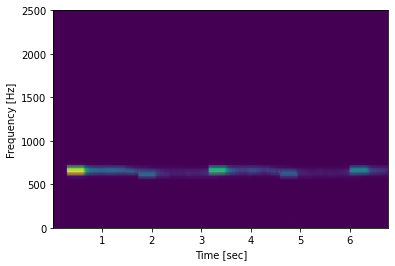

In [12]:
plt.pcolormesh(t, f, harm, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 2500)
plt.show()

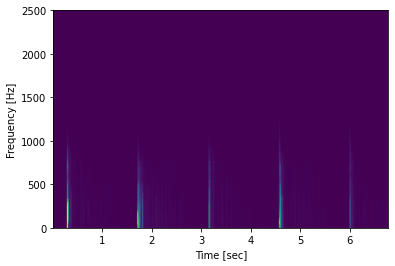

In [13]:
plt.pcolormesh(t, f, perc, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 2500)
plt.show()

In [14]:
X = np.greater(harm,perc)
Xy = np.greater(perc,harm)
Mx = np.empty_like(harm)
Mx = np.where(X==True,1,0)
My = np.where(Xy==True,1,0)


In [15]:
Zxx_harm = Mx*Zxx

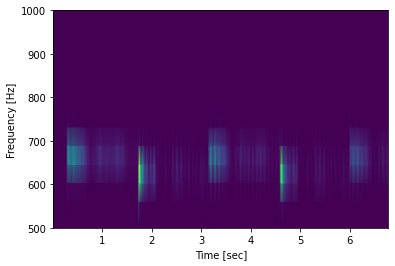

In [16]:
Zxx_perc = My*Zxx

plt.pcolormesh(t, f, Zxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(500, 1000)
plt.show()

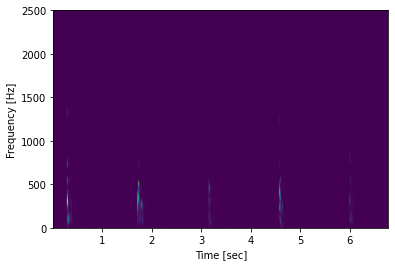

1.759572072072072

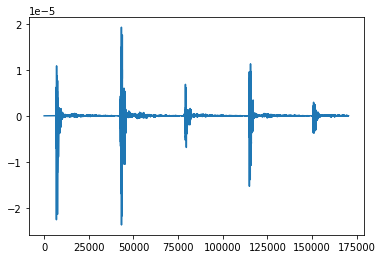

In [17]:
plt.pcolormesh(t, f, Zxx_perc, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 2500)
plt.show()
y, xrec = signal.istft(Zxx_perc, fs)
plt.plot(xrec)
(680000-380000)/xrec.size

In [18]:
xrec.size

170496

In [19]:
x.size/xrec.size

1.759572072072072

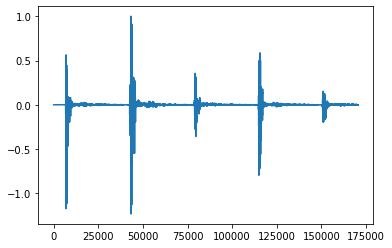

In [20]:
xrec = xrec/max(xrec)
plt.plot(xrec)

In [21]:

from scipy.io.wavfile import write
write('perc.wav', 44100,xrec)
import IPython.display as ipd
ipd.Audio('perc.wav')

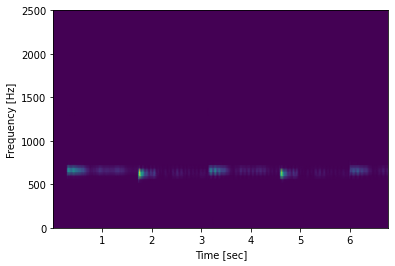

In [22]:
plt.pcolormesh(t, f, Zxx_harm, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0, 2500)
plt.show()

In [23]:
def stp(x, N, H):
    # x:  Input signal
    # N:  Frame length
    # H:  Hopsize
    x_pad = np.concatenate((x, np.zeros(N)))
    num_windows = np.ceil(1 + (len(x) - N) / H)
    win_pos = np.arange(num_windows) * H
    idx = np.array([np.arange(w, w+N) for w in win_pos], dtype='int32')
    P = (x_pad[idx] ** 2).sum(axis=1) / N
    return P

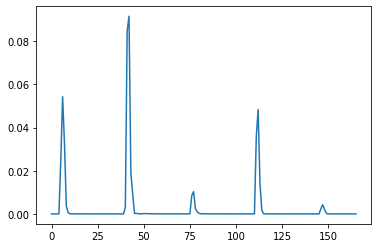

In [95]:
P = stp(xrec,2048,1024)
plt.plot(P)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.632726262913001e-22
4.6239019833551955e-21
0.0025057284678254273
0.0062554608248327715
0.011541094594409483
0.01884748435398132
0.023899740618824994
0.02850055959741487
0.03168373080536714
0.033054751159192805
0.034285376442548296
0.03474986727940592
0.0351261075965413
0.03534597645688591
0.032955584493517445
0.029298982274871318
0.024080085629045792
0.01678891552073619
0.011745378068453735
0.007149333187551023
0.003968163847790257
0.0025995059975608024
0.0013720403894441466
0.0009111161719982037
0.0005376759339098297
0.0003196796075075937
0.0002055747091163442
0.0001133011386646901
4.755700467209787e-05
3.343522775215589e-05
2.566079591680968e-05
2.2210924397764294e-05
2.213968301515253e-05
2.1546236365206718e-05
2.009018900825606e-05
1.9804762938671063e-05
2.1754472173435427e-05
2.5024245969668695e-05
2.9496257412738e-05
3.22825237584044e-05
3.3167361134456204e-05
3.5126854968526615e-05
3.848974218654094e-05
4.2697250603733865e-05
4.608025103

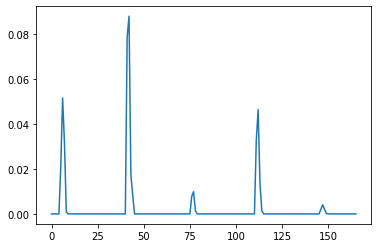

In [96]:
J = 34
Ptm=np.zeros_like(P)
for m in range(P.size):
    Ptm[m] = np.sum(P[m:m+J])/(J+1)
    #print(Ptm[m])

#plt.plot(Ptm)
Pref = P-Ptm
#plt.plot(Pref)
N = np.max((np.zeros_like(P),Pref),axis=0)
plt.plot(N)
#N.size

In [101]:
def peak_picking(N):  
    novelty =N
    pos = np.append(novelty, novelty[-1]) > np.insert(novelty, 0, novelty[0])
    neg = np.logical_not(pos)
    peaks = np.where(np.logical_and(pos[:-1], neg[1:]))[0]
    
    values = novelty[peaks]
    values /= np.max(values)
    peaks = peaks[values >= 0.01]
    values = values[values >= 0.01]
    peaks_idx = np.int32(np.round(peaks*1024*1.75))
    return peaks_idx

In [102]:
peaks_idx= peak_picking(N)

In [103]:
peaks_idx

array([ 10752,  75264, 137984, 200704, 263424], dtype=int32)

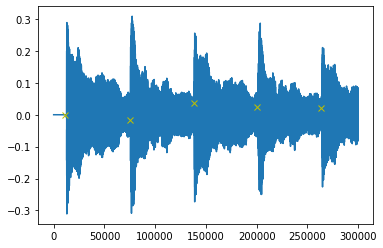

In [104]:
plt.plot(x)
plt.plot(peaks_idx,x[peaks_idx],'x',c='y')

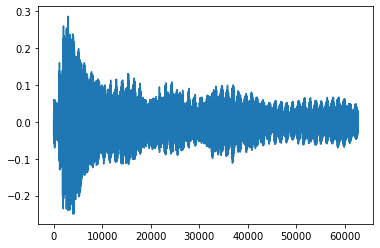

In [105]:
plt.plot(x[peaks_idx[3]:peaks_idx[4]])